In [133]:
### Importing the required Libraries

In [175]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [176]:


autoencoder = keras.models.load_model('./data/initially_trained_autoencoder.h5')

In [177]:



# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


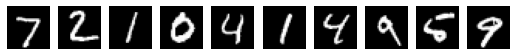

In [178]:


n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

313/313 [==============================] - 2s 6ms/step


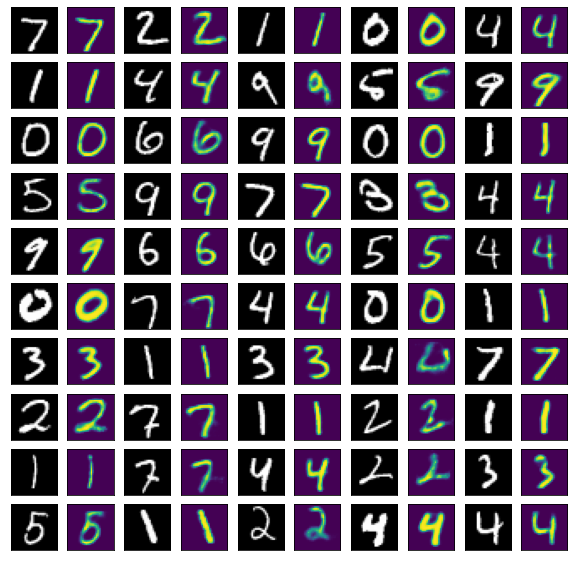

In [179]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [180]:


input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(700, activation='relu'))
autoencoder.add(Dense(400, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(400, activation='relu'))
autoencoder.add(Dense(700, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 700)               549500    
                                                                 
 dense_81 (Dense)            (None, 400)               280400    
                                                                 
 dense_82 (Dense)            (None, 100)               40100     
                                                                 
 dense_83 (Dense)            (None, 16)                1616      
                                                                 
 dense_84 (Dense)            (None, 100)               1700      
                                                                 
 dense_85 (Dense)            (None, 400)               40400     
                                                                 
 dense_86 (Dense)            (None, 700)             

In [181]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 20s 36ms/step - loss: 0.1844 - val_loss: 0.1309
Epoch 2/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1225 - val_loss: 0.1150
Epoch 3/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1118 - val_loss: 0.1083
Epoch 4/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1070 - val_loss: 0.1050
Epoch 5/10
469/469 [==============================] - 17s 35ms/step - loss: 0.1041 - val_loss: 0.1032
Epoch 6/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1019 - val_loss: 0.1015
Epoch 7/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1003 - val_loss: 0.1000
Epoch 8/10
469/469 [==============================] - 17s 35ms/step - loss: 0.0990 - val_loss: 0.0991
Epoch 9/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0979 - val_loss: 0.0983
Epoch 10/10
469/469 [==============================] - 17s 35ms/step - loss: 0.097

313/313 [==============================] - 2s 7ms/step


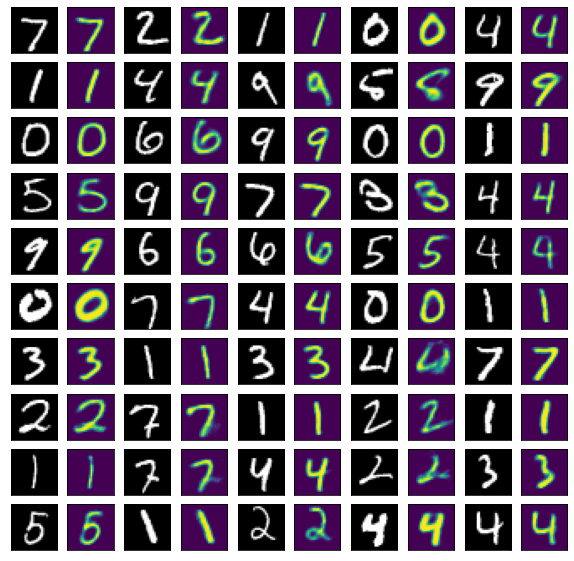

In [182]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

1/1 [==============================] - 0s 16ms/step
(1, 784)


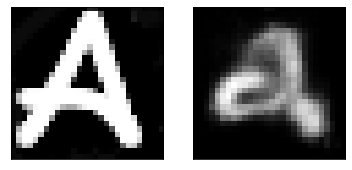

In [183]:



####################################
# load a sample image
image = tf.keras.utils.load_img('A5.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

In [184]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [185]:
# Define the image paths
image_paths = ['A1.png', 'A2.png', 'A3.png', 'A4.png', 'A5.png']

# Create an empty list to store the preprocessed images
input_images = []

# Load and preprocess each image
for path in image_paths:
    # Load the image
    image = tf.keras.utils.load_img(path, target_size=(28, 28), color_mode="grayscale")

    # Convert the image to an array and normalize between 0 and 1
    input_arr = tf.keras.utils.img_to_array(image) / 255

    # Flatten the image array and add it to the input_images list
    input_images.append(input_arr.flatten())

# Convert the input_images list to a numpy array and reshape it
input_arr = np.array(input_images)
input_arr = input_arr.reshape((input_arr.shape[0], 784))

# Print the shape of the input array
print(input_arr.shape)

(5, 784)


In [186]:
A_image_train = np.repeat(input_arr, 3000, axis=0)
A_image_test = np.repeat(input_arr, 1000, axis=0)
print(A_image_train.shape)
print(A_image_test.shape)

(15000, 784)
(5000, 784)


In [187]:
A_image_train = np.random.shuffle(A_image_train) 
A_image_test = np.random.shuffle(A_image_test) 

In [188]:
train_images = np.random.shuffle(train_images) 
test_images = np.random.shuffle(test_images) 

In [189]:
new_train_set = np.vstack((train_images, A_image_train))
new_test_set = np.vstack((test_images, A_image_test))

In [190]:
new_train_set = np.random.shuffle(new_train_set) 
new_test_set = np.random.shuffle(new_test_set) 

TypeError: 'NoneType' object is not subscriptable

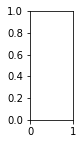

In [191]:


n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(new_train_set[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [192]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=new_train_set, # For autoencoders, both the input and the target are the same
    y=new_train_set, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_test_set, new_test_set),
    callbacks=[early_stop]
)


ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [ ]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [ ]:



####################################
# load a sample image
image = tf.keras.utils.load_img('A5.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()